# Exercise 2 - Mean Average Precision

## Objective

In this exercise, you will have to implement the Mean Average Precision (mAP) metric.

## Details

To do so, you will first have to create the Precision-Recall (PR) curve. Once this curve is created, you 
need to create the smoothed version as discussed in the lesson. Finally you can use this smoothed
version to calculate the mAP.

You also have to create a visualization of the PR and smoothed PR curves.

Make sure to check the `Desktop` to see your visualization when running the code.

## Tips

To create the PR curve, you need to sort the predictions based on their confidence score and calculate the precision and recall for each subset of the predictions, as explained in the course.

To make your life easier, you can hard code the smoothed PR curve based on the PR curve, but 
you should think of a scripted version of doing so.

1 0.2417094455852156 0
1 0.0 0
1 0.0 0
1 0.0 0
1 0.6745264785465791 1
1 0.0 1
1 0.0 1
1 0.0 1
1 0.7969015040144747 2
1 0.0 2
1 0.4419111635934236 2
1 0.0 2
1 0.0 2
1 0.08123510517044866 2
3 0.1539865658999731 2
3 0.0 2
3 0.0 2
3 0.0 2
3 0.9114202179498538 2
3 0.0 2
3 0.0 2
1 0.0 2
1 0.07885714285714286 2
1 0.0 2
1 0.04232129187474939 2
1 0.0 2
1 0.0 2
1 0.7271866717152594 3
1 0.0 3
1 0.43065145933067134 3
1 0.0 3
1 0.8451453852254593 4
1 0.0 4
1 0.0 4
1 0.0260724186824117 4
2 0.0 4
2 0.45411354818275396 4
2 0.0 4
2 0.8339272918358572 4
2 0.0 4
2 0.0 4
2 0.037597730275269095 4
1 0.8534175446682558 5
1 0.0 5
1 0.0 5
1 0.0 5
1 0.12414345465871673 5
1 0.029801324503311258 5
1 0.0 5
1 0.0 5
1 0.0 5
1 0.7548321464903357 6
1 0.0 6
1 0.0 6
1 0.0 6
1 0.0 6
[[1.0, 0.14285714285714285], [1.0, 0.2857142857142857], [0.6666666666666666, 0.2857142857142857], [0.75, 0.42857142857142855], [0.8, 0.5714285714285714], [0.6666666666666666, 0.5714285714285714], [0.7142857142857143, 0.7142857142857143], [0.7

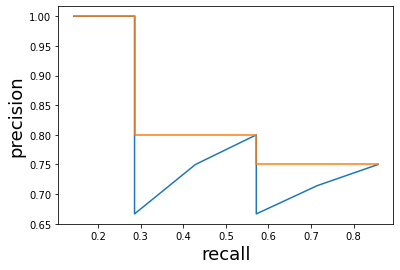

0.7285714285714285
mAP calculation is correct!


In [27]:
import copy
import json
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

from utils import calculate_iou, check_results


if __name__ == '__main__':
    # load data 
    with open('data/predictions.json', 'r') as f:
        preds = json.load(f)

    with open('data/ground_truths.json', 'r') as f:
        gts = json.load(f)
    
    # TODO IMPLEMENT THIS SCRIPT
    boxes = preds[0]['boxes']
    classes = preds[0]['classes']
    scores = preds[0]['scores']

    predictions = [(bb, cl, sc) for bb, cl, sc in zip(boxes, classes, scores)]
    predictions = sorted(predictions, key=lambda k:k[-1])[::-1]
    predictions    
    
    
    total = len(gts[0]['boxes'])
    tp = 0
    curve = []
    for idx, pred in enumerate(predictions):
        for bb in gts[0]['boxes']:
            iou = calculate_iou(bb, pred[0])
            if iou > 0.5:
                if pred[1] == 1:
                    tp += 1

            print(pred[1], iou, tp)        

        # TODO: I think denominator should only include predicted_class = 1? but it include all predicted classes here, why? 
        prec = tp / (idx + 1) 
        rec = tp / total
        curve.append([prec, rec])

    print(curve)    
    
    curve = np.array(curve)    
    
    # smooth PR curve
    ct = Counter(curve[:, 1])
    boundaries = sorted([k for k,v in ct.items() if v > 1])
    # get max precision values
    maxes = []
    for i in range(len(boundaries)):
        if i != len(boundaries) - 1:
            loc = [p[0] for p in curve if boundaries[i+1] >= p[1] > boundaries[i]]
            maxes.append(np.max(loc))
        else:
            loc = [p[0] for p in curve if p[1] > boundaries[i]]
            maxes.append(np.max(loc))

    smoothed = copy.copy(curve)
    replace = -1
    for i in range(smoothed.shape[0]-1):
        if replace != -1:
            smoothed[i, 0] = maxes[replace]
        if smoothed[i, 1] == smoothed[i+1, 1]:
            replace += 1    
            
            
    plt.plot(curve[:, 1], curve[:, 0])
    plt.plot(smoothed[:, 1], smoothed[:, 0])
    plt.xlabel('recall', fontsize=18)
    plt.ylabel('precision', fontsize=18)
    plt.show()    
    
    
    mAP = 0
    for i in range(len(smoothed)):
        if i == 0:
            mAP += smoothed[i][1] * smoothed[i][0] 
        else:
            mAP += (smoothed[i][1] - smoothed[i-1][1]) * smoothed[i][0]         

    print(mAP)   

    check_results(mAP)

In [2]:
import copy
import json
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

from utils import calculate_iou, check_results

# load data 
with open('data/predictions.json', 'r') as f:
    preds = json.load(f)
    print(preds)

with open('data/ground_truths.json', 'r') as f:
    gts = json.load(f)
    print(gts)

[{'boxes': [[783, 1104, 1011, 1700], [717, 0, 908, 280], [734, 0, 1100, 240], [744, 0, 1080, 258], [753, 474, 868, 609], [830, 1500, 1004, 1914], [758, 192, 811, 364], [810, 1576, 973, 1909]], 'classes': [1, 1, 1, 2, 1, 1, 1, 3], 'scores': [0.32, 0.97, 0.51, 0.44, 0.12, 0.99, 0.73, 0.95], 'filename': 'segment-1231623110026745648_480_000_500_000_with_camera_labels_38.png'}]
[{'boxes': [[793, 1134, 1001, 1718], [737, 0, 898, 260], [763, 484, 878, 619], [734, 0, 1114, 277], [820, 1566, 974, 1914], [762, 951, 844, 1175], [748, 197, 803, 363]], 'classes': [1, 1, 1, 1, 1, 1, 1], 'filename': 'segment-1231623110026745648_480_000_500_000_with_camera_labels_38.png'}]


In [4]:
boxes = preds[0]['boxes']
classes = preds[0]['classes']
scores = preds[0]['scores']

predictions = [(bb, cl, sc) for bb, cl, sc in zip(boxes, classes, scores)]
predictions = sorted(predictions, key=lambda k:k[-1])[::-1]
predictions

[([830, 1500, 1004, 1914], 1, 0.99),
 ([717, 0, 908, 280], 1, 0.97),
 ([810, 1576, 973, 1909], 3, 0.95),
 ([758, 192, 811, 364], 1, 0.73),
 ([734, 0, 1100, 240], 1, 0.51),
 ([744, 0, 1080, 258], 2, 0.44),
 ([783, 1104, 1011, 1700], 1, 0.32),
 ([753, 474, 868, 609], 1, 0.12)]

In [8]:
total = len(gts[0]['boxes'])
tp = 0
curve = []
for idx, pred in enumerate(predictions):
    for bb in gts[0]['boxes']:
        iou = calculate_iou(bb, pred[0])
        if iou > 0.5:
            if pred[1] == 1:
                tp += 1

        print(pred[1], iou, tp)        
        
    # TODO: I think denominator should only include predicted_class = 1? but it include all predicted classes here, why? 
    prec = tp / (idx + 1) 
    rec = tp / total
    curve.append([prec, rec])
    
print(curve)

1 0.2417094455852156 0
1 0.0 0
1 0.0 0
1 0.0 0
1 0.6745264785465791 1
1 0.0 1
1 0.0 1
1 0.0 1
1 0.7969015040144747 2
1 0.0 2
1 0.4419111635934236 2
1 0.0 2
1 0.0 2
1 0.08123510517044866 2
3 0.1539865658999731 2
3 0.0 2
3 0.0 2
3 0.0 2
3 0.9114202179498538 2
3 0.0 2
3 0.0 2
1 0.0 2
1 0.07885714285714286 2
1 0.0 2
1 0.04232129187474939 2
1 0.0 2
1 0.0 2
1 0.7271866717152594 3
1 0.0 3
1 0.43065145933067134 3
1 0.0 3
1 0.8451453852254593 4
1 0.0 4
1 0.0 4
1 0.0260724186824117 4
2 0.0 4
2 0.45411354818275396 4
2 0.0 4
2 0.8339272918358572 4
2 0.0 4
2 0.0 4
2 0.037597730275269095 4
1 0.8534175446682558 5
1 0.0 5
1 0.0 5
1 0.0 5
1 0.12414345465871673 5
1 0.029801324503311258 5
1 0.0 5
1 0.0 5
1 0.0 5
1 0.7548321464903357 6
1 0.0 6
1 0.0 6
1 0.0 6
1 0.0 6
[[1.0, 0.14285714285714285], [1.0, 0.2857142857142857], [0.6666666666666666, 0.2857142857142857], [0.75, 0.42857142857142855], [0.8, 0.5714285714285714], [0.6666666666666666, 0.5714285714285714], [0.7142857142857143, 0.7142857142857143], [0.7

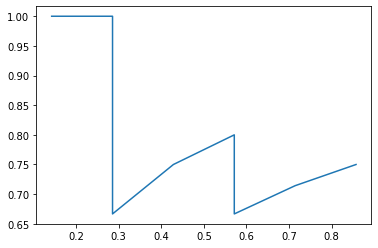

In [13]:
curve = np.array(curve)
plt.plot(curve[:, 1], curve[:, 0])

In [14]:
 # smooth PR curve
ct = Counter(curve[:, 1])
boundaries = sorted([k for k,v in ct.items() if v > 1])
# get max precision values
maxes = []
for i in range(len(boundaries)):
    if i != len(boundaries) - 1:
        loc = [p[0] for p in curve if boundaries[i+1] >= p[1] > boundaries[i]]
        maxes.append(np.max(loc))
    else:
        loc = [p[0] for p in curve if p[1] > boundaries[i]]
        maxes.append(np.max(loc))
        
smoothed = copy.copy(curve)
replace = -1
for i in range(smoothed.shape[0]-1):
    if replace != -1:
        smoothed[i, 0] = maxes[replace]
    if smoothed[i, 1] == smoothed[i+1, 1]:
        replace += 1 

In [15]:
smoothed

array([[1.        , 0.14285714],
       [1.        , 0.28571429],
       [0.8       , 0.28571429],
       [0.8       , 0.42857143],
       [0.8       , 0.57142857],
       [0.75      , 0.57142857],
       [0.75      , 0.71428571],
       [0.75      , 0.85714286]])

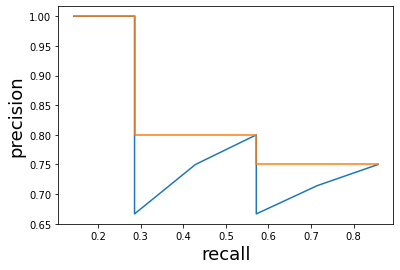

In [19]:
plt.plot(curve[:, 1], curve[:, 0])
plt.plot(smoothed[:, 1], smoothed[:, 0])
plt.xlabel('recall', fontsize=18)
plt.ylabel('precision', fontsize=18)
plt.show()

In [25]:
# calculate mAP
# cmin = 0
# mAP = 0
# for i in range(smoothed.shape[0] - 1):
#     if smoothed[i, 1] == smoothed[i+1, 1]:
#         mAP += (smoothed[i, 1] - cmin) * smoothed[i, 0]
#         cmin = smoothed[i, 1]
# mAP += (smoothed[-1, 1] - cmin) * smoothed[-1, 0]
# print(mAP)

area = 0
for i in range(len(smoothed)):
    if i == 0:
        area += smoothed[i][1] * smoothed[i][0] 
    else:
        area += (smoothed[i][1] - smoothed[i-1][1]) * smoothed[i][0]         

print(area)        


0.7285714285714285


In [26]:
check_results(mAP)

mAP calculation is correct!
